<a href="https://colab.research.google.com/github/alextawang/ML-nvdia-predict/blob/main/ML_stock_nvida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [3]:
#read in the data
df = pd.read_csv('stock_data_NVDA.csv',encoding='unicode_escape')
#show the data
print(df.columns)
df

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Volume
0,11/21/2024,149.35,152.89,140.70,146.67,"400,946,594"
1,11/20/2024,147.41,147.56,142.73,145.89,"309,871,719"
2,11/19/2024,141.32,147.13,140.99,147.01,"227,834,891"
3,11/18/2024,139.50,141.55,137.15,140.15,"221,866,000"
4,11/15/2024,144.87,145.24,140.08,141.98,"250,132,891"
...,...,...,...,...,...,...
221,01/08/2024,49.51,52.28,49.48,52.25,"642,509,874"
222,01/05/2024,48.46,49.55,48.31,49.10,"415,039,296"
223,01/04/2024,47.77,48.50,47.51,48.00,"306,534,877"
224,01/03/2024,47.49,48.18,47.32,47.57,"320,896,187"


In [4]:
df.sort_values(by=df.columns[0],inplace=True)
df.to_csv('sorted_stock_data_NVDA.csv',index=False)
df


,Date,Open,High,Low,Close,Volume
225,01/02/2024,49.24,49.30,47.60,48.17,"411,254,216"
224,01/03/2024,47.49,48.18,47.32,47.57,"320,896,187"
223,01/04/2024,47.77,48.50,47.51,48.00,"306,534,877"
222,01/05/2024,48.46,49.55,48.31,49.10,"415,039,296"
221,01/08/2024,49.51,52.28,49.48,52.25,"642,509,874"
...,...,...,...,...,...,...
4,11/15/2024,144.87,145.24,140.08,141.98,"250,132,891"
3,11/18/2024,139.50,141.55,137.15,140.15,"221,866,000"
2,11/19/2024,141.32,147.13,140.99,147.01,"227,834,891"
1,11/20/2024,147.41,147.56,142.73,145.89,"309,871,719"


In [22]:
df = pd.read_csv('sorted_stock_data_NVDA.csv',encoding='unicode_escape')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df["Volume"] = df["Volume"].replace({",",""},regex=True).astype(float)
df.to_csv('sorted_stock_data_NVDA.csv',index=False)
df


,Date,Open,High,Low,Close,Volume
0,2024-01-02,49.24,49.30,47.60,48.17,411254216.0
1,2024-01-03,47.49,48.18,47.32,47.57,320896187.0
2,2024-01-04,47.77,48.50,47.51,48.00,306534877.0
3,2024-01-05,48.46,49.55,48.31,49.10,415039296.0
4,2024-01-08,49.51,52.28,49.48,52.25,642509874.0
...,...,...,...,...,...,...
221,2024-11-15,144.87,145.24,140.08,141.98,250132891.0
222,2024-11-18,139.50,141.55,137.15,140.15,221866000.0
223,2024-11-19,141.32,147.13,140.99,147.01,227834891.0
224,2024-11-20,147.41,147.56,142.73,145.89,309871719.0


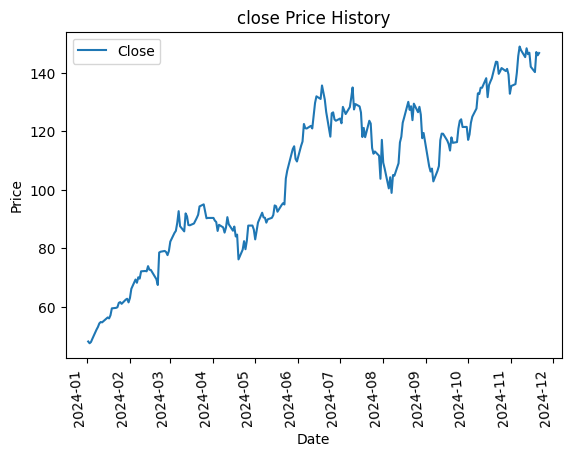

In [28]:
df.plot(x="Date",y="Close")
plt.xticks(rotation=95)
plt.title('close Price History')
plt.ylabel("Price")
plt.show()


In [24]:
#create the model
model = RandomForestRegressor(  )

In [25]:
#train the model
X=df[["Open","High","Low","Volume"]]
X=X[:int(len(df)-2)]

y=df["Close"].shift(-1)
y=y[:int(len(df)-2)]
model.fit(X,y)

RandomForestRegressor()

In [26]:
#test the model
print('the model score is ',model.score(X,y))


the model score is  0.996558362017455


In [19]:
#make predictions
new_data = df[["Open","High","Low","Volume"]].tail(2)[0:1]
prediction = model.predict(new_data)
print('the model prodicts the last day price to be : ',prediction)
print('Actual value:',df[["Close"]].tail(1).values[0][0])



the model prodicts the last day price to be :  [146.3187]
Actual value: 146.67
